# Examen Final

## Laboratorio Métodos Computacionales 2021-10

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de sicua. El archivo debe ser nombrado ApellidoNombre_ExamenFinal.ipynb. La actividad es completamente individual.

**Conserve el formato del notebook y asegurese que su código corra de arriba hacia abajo con las soluciones en google colab**

**Entrega: Jueves 27 de Mayo 2021 11:59 pm**

Librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib import animation
from matplotlib import cm

## Problema 1


En el github del curso encontrara un archivo de texto dow.txt. La información contiene el promedio de los precios en el mercado stocks de Estados Unidos de la empresa Dow Jones. 

Escriba un programa que realice los siguientes pasos:

*   Lea los datos del archivo dow.txt
*   Cálcule los coefficientes de la transformada de Fourier usando la funcion np.fft.rfft  
*   Asigne los ultimos 90% de los coeficientes iguales a 0. Es decir mantenga los primeros 10% de los coeficientes y asigne el resto de coeficientes iguales a cero.
*   Calcule la transformada inversa de Fourier del arreglo del numeral anterior. Use la función np.fft.irfft.
*   Grafique el arreglo de numpy que resulta de la tranformada inversa de Fourier y grafique los datos originales encima. 

La evaluación se realizará a partir del gráfico generado

















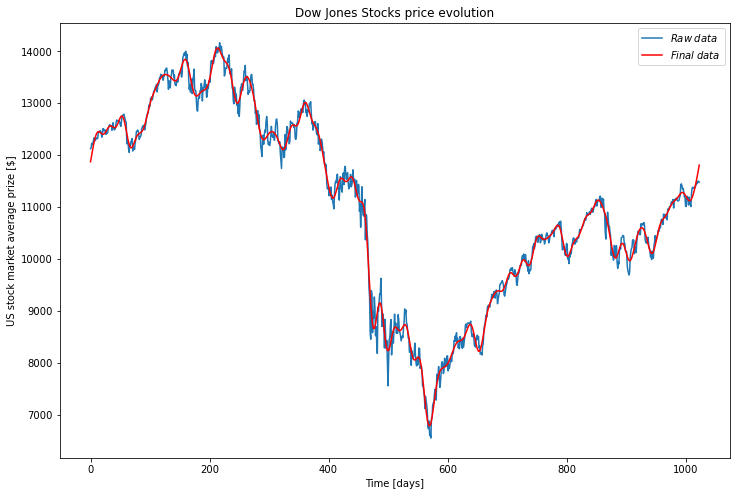

In [2]:
# leer los datos
df = pd.read_csv("https://raw.githubusercontent.com/diegour1/LabMetodosComputacionales/main/DataFiles/dow.txt", squeeze = True, header =None)
Data = df.to_list()
Tiempo = list(range(len(Data)))

FFT = np.fft.rfft(Data)
N = len(FFT)
for i in range(int(N/10), N):
    FFT[i]= 0
NewData = np.fft.irfft(FFT)

fig = plt.figure(figsize =  (12, 8))
ax = plt.axes()
ax.set_xlabel("Time [days]")
ax.set_ylabel("US stock market average prize [$]")
ax.set_title("Dow Jones Stocks price evolution")
plt.plot(Tiempo, Data, label="$Raw \; data$")
plt.plot(Tiempo, np.real(NewData), label="$Final \; data$ ", c = 'r')
ax.legend()
plt.show()

## Problema 2

Solucionar la ecuación de onda bidimensional para la condición de todos extremos libres para la posición inicial $p(x,y)$.

$$p(x,y) = \frac{1}{\sqrt{\sigma}}e^\left({\frac{(x-0.5)^2+(y-0.5)^2}{\sigma^2}}\right)$$

con $\sigma = 0.1$, en el dominio $x \in [0, 1]$,  $y \in [0, 1]$ y velocidad inicial de cada nodo igual a cero para $t=0$. Use los valores de la tabla. Realice una animación conservando todos los ajustes realizados en la animación.

**Tabla:**

|  |                                        |
|-----------------------|----------------------------------------|
| $$c$$                 |                                $$1.8$$ |
| $$dx$$                |                               $$0.05$$ |
| $$dy$$                |                               $$0.05$$ |
| $$t_{total}$$           |                                  $$1$$ |
| $$dt$$                | $$\frac{1}{10c}\frac{dx^2dy^2}{dx^2+dy^2}$$ |

a) Resuelva la función de onda en 2 dimensiones con los extremos libres, use como guía el siguiente notebook [Ejemplo en 1D](https://github.com/diegour1/LabMetodosComputacionales/blob/main/Notebooks/ejemplos_ecuacion_onda_1D.ipynb).

b) Realizar una animación en perspectiva 3D que genere un video en formato mp4. Debe agregar a la animación un cambio lento en el azimut del punto de observación en la gráfica 3d. Cambiar los colores por defecto de los planos de los ejes coordenados asignándoles un color en formato hexadecimal (hex) seleccionado con la herramienta de *color picker* presente en el buscador de Google. Aplicar a la superficie solución alguno de los *colormaps* disponibles en matplotlib y mantener fijos los tonos del *colormap* respecto a la altura (`vmin`, `vmax`). La animación debe mantener fijos los límites del sistema coordenado en el eje $z$ a lo largo del tiempo. Seleccionar un cuadro de cada $50$ calculados para hacer la animación. Cada cuadro debe tener un tamaño de $9\times6$ pulgadas con una densidad de $75$ pixeles por pulgada y debe estar a $24$ cuadros por segundo. **Consejo:** mientras desarrolla y prueba el código utilice un tiempo total más pequeño, por ejemplo $0.1$, y solo cuando todo esté funcionando correctamente cámbielo a $1.0$.

En la calificación el notebook se correra en Google Colab, de cualquier forma adjunte la animación en un video de youtube público, debe obtener un video como el que se muestra, 

Cambie este link por su video de youtube, 

Espacio para el video de youtube

https://www.youtube.com/watch?v=N8P2eDiZP_Q

In [3]:
# Implementación de solución de ecuación de onda

Xmin, Xmax = 0.,1.
Ymin, Ymax = 0.,1.
Tmin, Tmax = 0.,1.
deltax, deltay = 0.05, 0.05
c = 1.8
deltat = (1/(10*c))*(((deltax*deltay)**2)/((deltax**2)+(deltay**2)))

x = np.linspace(Xmin-deltax, Xmax+deltax, num = 1+int(np.round((Xmax-Xmin + 2*deltax)/deltax)))
y = np.linspace(Ymin-deltay, Ymax+deltay, num = 1+int(np.round((Ymax-Ymin + 2*deltay)/deltay)))

Npoints_x = len(x)
Npoints_y = len(y)
Npoints_t = 1+int(np.round((Tmax-Tmin)/deltat))
t = np.linspace(Tmin, Tmax, num = Npoints_t)

lambda_ = c*deltat/deltax
mu_ = c*deltat/deltay

def U0(x, y):
    sig = 0.1
    return np.exp(-(((x-0.5)**2)+((y-0.5)**2))/sig**2)/np.sqrt(sig)

def V0(x, y):
    return 0

def EcuOnda2D(U, x, y):
    
    for i in range(len(x)):
        for j in range(len(y)):
            U[0,i,j] = U0(x[i],y[j])
            
    for i in range(1,len(x)-1):
        for j in range(1,len(y)-1):
            
            U[1,i,j] = (1-lambda_**2)*U0(x[i], y[j]) \
            + (1-mu_**2)*V0(x[i], y[j]) \
            +((lambda_**2)/2)*(U0(x[i+1], y[j])+U0(x[i-1], y[j]))\
            +((mu_**2)/2)*(U0(x[i], y[j+1])+U0(x[i], y[j-1]))              
    
    for l in range(1,Npoints_t-1):
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):                   
                    U[l+1,i,j] = 2*(1 - (lambda_**2) - (mu_**2))*U[l,i,j] \
                    + (lambda_**2)*(U[l,i+1,j]+U[l,i-1,j]) \
                    + (mu_**2)*(U[l,i,j+1]+U[l,i,j-1]) \
                    - U[l-1, i, j]
                    
        U[l+1,0,:] = U[l+1,1,:]
        U[l+1,-1,:] = U[l+1,-2,:]
        U[l+1,:,0] = U[l+1,:,1]
        U[l+1,:,-1] = U[l+1,:,-2]
        
    return x[1:-1], y[1:-1],  U[:,1:-1,1:-1]

U = np.zeros([Npoints_t,Npoints_x,Npoints_y])
X,Y,U = EcuOnda2D(U, x, y)

In [4]:
## Codigo que puede usar para guiar su animación puede cambiar el código
def update_plot(frame_num,X,Y,U,ax):
    ax.clear()
    ax.set_xlim([0.,1.0])
    ax.set_ylim([0.,1.0])
    ax.set_zlim([np.min(U)-2, np.max(U)+2])
    ax.view_init(elev=25., azim=30 + frame_num/10)
    ax.set_title("$Time = {:.2f}$".format(t[frame_num*50]), fontsize=10, y=0.98)
    ax.set_xlabel('$x$', fontsize=10)
    ax.set_ylabel('$y$', fontsize=10)
    z = U[frame_num,:,:]
    X1, Y1 = np.meshgrid(X, Y)
    ax.plot_surface(X1,Y1,z, cmap=cm.cool, vmin= np.min(U), vmax=np.max(U)*0.7)
    
def crear_animacion(X,Y,U,name):
    N = U.shape[0]
    fig = plt.figure(figsize = (9,6), dpi = 75)
    fig.subplots_adjust(left=-0.1, right=1, bottom=0, top=1) 
    ax = fig.gca(projection = '3d')
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('#c800ff')
    ax.yaxis.pane.set_edgecolor('#c800ff')
    ax.zaxis.pane.set_edgecolor('#c800ff')
    #ax.grid(False)
    ax.set_title("$Time = 0.0$", fontsize=10, y=0.95) 
    ani = animation.FuncAnimation(fig, update_plot, range(1,N), fargs=(X,Y,U,ax))
    ani.save(name,fps=24)
    plt.close(fig)

start_time = time.time()
crear_animacion(X,Y,U[::50],'solucion_ecu_onda_2D_libre.mp4')
print("Tiempo usado en crear la animación (s):", time.time() - start_time)

Tiempo usado en crear la animación (s): 116.99321627616882


In [5]:
# Mostrar video
from IPython.display import HTML
from base64 import b64encode

name = 'solucion_ecu_onda_2D_libre.mp4'
mp4 = open(name,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=675 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)